<a href="https://colab.research.google.com/github/Liam-Nova/BIT_IA_Bootcamp/blob/main/S5_C1_DecisionTree_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árbol de Decisión - Evaluación del riesgo de ataque cardíaco

In [1]:
## Importar las librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split #  **sklearn** libreria usada para machine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
import numpy as np


In [2]:
from google.colab import drive # Conectanonos con google drive
drive.mount('/content/drive')
import os    # la librería necesaria para la ruta de la carpeta
os.chdir('/content/drive/MyDrive/Colab Notebooks/BIT_Bootcam_IA/DataSET')
#mostar lista de archivos
os.listdir()

Mounted at /content/drive


['marketing_campaign.csv',
 'marketing_campaign.xlsx',
 'marketing_extract_2X_Income.xlsx',
 'linear_regression_model (1).pkl',
 'poly_regression_model (1).pkl',
 'auto-mpg.names',
 'auto-mpg.data-original',
 'auto-mpg.data',
 'Index',
 'mpg-limpios-procesados.xlsx',
 'Classification_Tests.csv',
 'heart_attack_risk_dataset.csv',
 'generated_classification_data.csv']

In [3]:
# Cargue los datos
df = pd.read_csv('heart_attack_risk_dataset.csv')
df.head()

,Age,Weight,Smoker,Risk
0,27,53,0,0
1,46,93,0,0
2,29,56,1,0
3,42,81,0,0
4,21,93,1,0


**Q1** ¿A qué decision podríamos llegar con estos datos?

* Para el sector salud, una herramienta de apoyo al
diagnostico de riesgo de infartos
´*  Para predecir el nivel  de riesgo alto o bajo

**Q2** ¿Que tipo de problema debemos abordar?
es un problema de clasificacion
Target = Risk

In [4]:
Y = df['Risk']
X = df.drop('Risk', axis=1)

# Actividad 1. Separar las características (X) de la variable objetivo (y)

* Cuál es la variable objetivo?

* Cuáles son los atributos?


# Actividad 2. Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=30)

# Del datafrend = dataset = df

* **test** = valor que se selecciona de df para hacer una muestra
* **train** = valor que queda del df despues de sacar la muestra para el test

In [6]:
print(X_train,)

    Age  Weight  Smoker
93   46      70       0
4    21      93       1
51   26      58       0
72   17      79       0
1    46      93       0
..  ...     ...     ...
12   24      67       0
97   27      63       0
45   36      57       0
99   52      95       1
37   46      97       1

[80 rows x 3 columns]


In [7]:
print(y_train)

93    0
4     0
51    0
72    1
1     0
     ..
12    0
97    0
45    0
99    1
37    1
Name: Risk, Length: 80, dtype: int64


# Actividad 3. Seleccione y ajuste el modelo: árbol de decision

* Ejecute lás líneas de código, si desea cambie el nombre del modelo



In [8]:
# Crear el modelo de árbol de decisión
modeloDTC = DecisionTreeClassifier()

# Entrenar el modelo
modeloDTC.fit(X_train, y_train)

DecisionTreeClassifier()

# Actividad 4. Hacer predicciones sobre los datos de prueba

* Aplique al modelo la palabra predict y evalue en los datos de prueba y guardelos en y_pred


```
modelo.predict(datos_de_prueba)
```



In [9]:
print(X_test)

    Age  Weight  Smoker
20   56      83       0
91   22      91       0
34   46      63       1
52   37      68       1
8    24      54       0
74   35      82       1
21   29      67       1
88   58      92       1
80   55      56       0
89   45      98       0
82   31      73       0
38   57      70       0
0    27      53       0
77   36      50       0
42   38      95       0
67   18     100       1
68   28      63       1
92   27      63       0
48   24      93       1
10   41      87       1


In [10]:
print(y_test)

20    0
91    0
34    1
52    1
8     0
74    1
21    0
88    1
80    0
89    0
82    0
38    0
0     0
77    0
42    0
67    0
68    0
92    0
48    0
10    1
Name: Risk, dtype: int64


In [11]:
y_test_array = y_test

In [12]:
y_pred = modeloDTC.predict(X_test) # hace predicciones
y_test_array = y_test.to_numpy()

In [13]:
# y_test = y_test.to_numpy()
# print(y_test)

In [14]:
# y_pred = modeloDTC.predict(X_test) # hace predicciones
# print(f"presición del modelo: {accuracy_score(y_test, y_pred)}")
# y_test = y_test.to_numpy()
# print(f"Etiquetas Reales {y_test}")
# print(f"Etiquetas Predichas {y_pred}")


# Actividad 5. Evalue el modelo

* Use la medida de accuracy para medir el desempeño del modelo

```
accuracy_score(y_test, y_pred)
```
* Genere un reporte de medidas del modelo con

```
classification_report(y_test, y_pred)
```


* Imprima las mediciones y acopmpañe de valores que orienten al usuario

In [15]:

print(f"Etiquetas Reales {y_test_array}")
print(f"Etiquetas Predichas {y_pred}")
print(f"presición del modelo: {accuracy_score(y_test, y_pred)*100}%")
print("Reporte de clasificación")
target_names = ['Bajo Riesgo (0)', 'Alto Riesgo (1)']
print(classification_report(y_test, y_pred, target_names = target_names))


Etiquetas Reales [0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1]
Etiquetas Predichas [0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1]
presición del modelo: 100.0%
Reporte de clasificación
                 precision    recall  f1-score   support

Bajo Riesgo (0)       1.00      1.00      1.00        15
Alto Riesgo (1)       1.00      1.00      1.00         5

       accuracy                           1.00        20
      macro avg       1.00      1.00      1.00        20
   weighted avg       1.00      1.00      1.00        20



In [16]:
report = classification_report(y_test, y_pred)

In [17]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



La clase que tiene mejor prediccion

# Actividad 6. Visualizar el árbol de decisión



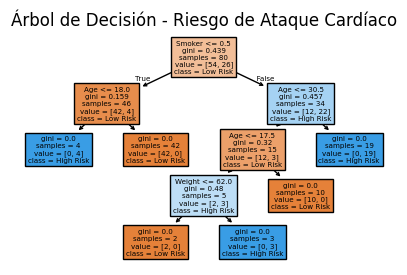

In [18]:
plt.figure(figsize=(5,3))
tree.plot_tree(modeloDTC, feature_names=['Age', 'Weight', 'Smoker'], class_names=['Low Risk', 'High Risk'], filled=True)
plt.title("Árbol de Decisión - Riesgo de Ataque Cardíaco")
plt.show()

# Actividad 7. Ejemplo de predicción

* Escriba un código para evaluar un dato del modelo

* Use estos comentarios que orienten al usuario



```
print("\nPredicción con un ejemplo nuevo:")
print(f"Predicción (0 = Bajo Riesgo, 1 = Alto Riesgo): {prediction[0]}")

```



In [19]:
# df['Age'].sort_values()

In [20]:
# df['Weight'].sort_values()

In [21]:
example = [[12, 54, 1]] # ejemplo : 32 años, 70 kg, fumadr

prediccion = modeloDTC.predict(example)
if prediccion[0] == 0:
    print("El paciente tiene un riesgo bajo")
else:
    print("El paciente tiene un riesgo alto")



El paciente tiene un riesgo bajo


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Parte 3. Leer los parámetros del modelo entrendo ( árbol aprendido)

* get_depth()
* get_n_leaves()
* apply(X)

In [22]:
# modelo CART = tipo de formato que el modelo uso para ejecutar el arbol
# se mira en el propio arbol
modelo_CART_100 = modeloDTC

In [23]:
get_depth = modelo_CART_100.get_depth()
print(f"El arbol tiene una profundadad de {get_depth}")

El arbol tiene una profundadad de 4


# **get_depth** niveles desde la base hasta el nodo mas lejano

* **nodo**: es el punto donde hay dos dos caminos:
  * camino donde va a una hoja y termina
  * camino donde continua al siguiente nodo

In [24]:
get_leaves = modelo_CART_100.get_n_leaves()
print(f"El arbol tiene {get_leaves} hojas")

El arbol tiene 6 hojas


# **get_leaves** muestra la cantidad de hojas o "finales" de todos los caminos

In [35]:
# Nodos terminal (n)hojas + (n)nodos = (n)nouns% queda pendiente
leaf_indices = modelo_CART_100.apply(X_test)
# me indica en donde se ubican los datos de test en las hojas del arbol

print(leaf_indices)
print(y_test_array)

[ 3  3 10 10  3 10  9 10  3  3  3  3  3  3  3  9  9  3  9 10]
[0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1]


In [36]:
get_params = modelo_CART_100.get_params()
get_params
# muestra los parametros que fueron asignados al arbol de desición

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

# **get_params** muestra los parametro que estan en el arbol de deciciones
'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'

In [38]:
predict_proba = modelo_CART_100.predict_proba(X_test)
print(predict_proba)

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


# **predict_proba** se usa para indicar el porcentaje de una valor segun este clasificado. Para este caso:
* la cantidad de columnas son las mismas que la cantidad que las clases
* la primera columna indica si la clasificacion es cero
* la segunda columna indica si la clasificacion es uno
* el valor es en porcentaje pero se mide entre cero y uno
* de haber mas clases los valores en cada celda de las columnas serian tipos float ya que podria variar su o sus probabilidades de pertenecer a una o mas clases

In [29]:
y_test

,Risk
20,0
91,0
34,1
52,1
8,0
74,1
21,0
88,1
80,0
89,0


# Parte 4. Modificando los parámetros del árbol

diseñar experimentos de entrenamiento

* max_depth
* min_samples_split
* min_samples_leaf

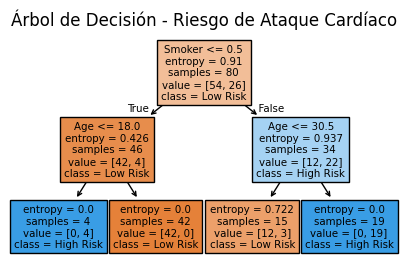

Precisión del modelo: 100.0 %
El árbol tiene una profundidad  de 2
El árbol tiene 4 hojas
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


In [30]:

Y = df['Risk']
X = df.drop('Risk', axis=1)

# Dividir los datos en conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=30)

# Datos

# Crear el modelo de árbol de decisión con ENTROPIA Y PODA
modelo_C45 = DecisionTreeClassifier(criterion="entropy", max_depth =4, min_impurity_decrease= 0.2) # min_samples_split = numero de ejemplos
# Experimento 1: gini
# Experimento 2: entropy, max_depth =3
# Experimento 3: entropy, max_depth = 4, min_impurity_decrease = 0.5
# Experimento 4: entropy, max_depth = 4, min_impurity_decrease = 0.2

# Entrenar el modelo fit
modelo_C45.fit(X_train, y_train)
# Hace predicciones
y_pred = modelo_C45.predict(X_test)
# Visualizacion del arbol
y_test_array = y_test.to_numpy()

plt.figure(figsize=(5,3))
tree.plot_tree(modelo_C45, feature_names=['Age', 'Weight', 'Smoker'], class_names=['Low Risk', 'High Risk'], filled=True)
plt.title("Árbol de Decisión - Riesgo de Ataque Cardíaco")
plt.show()

# Medición de desempeño
print(f"Precisión del modelo: {accuracy_score(y_test, y_pred)*100} %")
# Consulta de parámetros

get_depth = modelo_C45.get_depth()
print(f"El árbol tiene una profundidad  de {get_depth}")
get_leaves = modelo_C45.get_n_leaves()
print(f"El árbol tiene {get_leaves} hojas")
get_params = modelo_C45.get_params()
print(get_params)

# Parte 5. Validacion cruzada

Generar las posibles combinaciones de los parámetros del modelo (árbol)

In [31]:
from sklearn.model_selection import GridSearchCV

# Selecion de parametros
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 5, 10]
}



In [32]:
model= DecisionTreeClassifier()
validator = GridSearchCV(model, params, cv=5)
validator.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'min_samples_split': [2, 5, 10]})

In [33]:
# mide el tiempo de ejecucion del árbol
"""
import time
start_time = time.time()
# Crear el modelo de árbol de decisión
model= DecisionTreeClassifier()
validator = GridSearchCV(model, params, cv=5)
validator.fit(X_train, y_train)
# Punto de fin
end_time = time.time()

# Calcular el tiempo de ejecución
execution_time = end_time - start_time
print(f"Tiempo de ejecución: {execution_time} segundos")
"""

In [34]:
columns = ['params', 'mean_test_score', 'rank_test_score']
#rank_test_score es el ranking del puntaje obtenido en conjunto de parámetrso del pexperimento x
results = pd.DataFrame(validator.cv_results_)[columns]
results.sort_values(by='rank_test_score')

,params,mean_test_score,rank_test_score
6,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.9500,1
0,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.9375,2
1,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.9375,2
2,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.9375,2
15,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.9375,2
11,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.9375,2
9,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.9375,2
10,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.9375,2
14,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.9250,9
13,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.9250,9
